In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('amazon.csv', encoding='iso-8859-1', parse_dates= ['date'])

In [9]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [10]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [8]:
df.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [11]:
df.shape

(6454, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [13]:
df.duplicated().any()

np.True_

In [14]:
df = df.drop_duplicates()

In [15]:
df.shape

(6422, 5)

In [16]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [17]:
df.describe()

,year,number,date
count,6422.000000,6422.000000,6422
mean,2007.490969,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,0.000000,1998-01-01 00:00:00
25%,2003.000000,3.000000,2003-01-01 00:00:00
50%,2007.000000,24.497000,2007-01-01 00:00:00
75%,2012.000000,114.000000,2012-01-01 00:00:00
max,2017.000000,998.000000,2017-01-01 00:00:00
std,5.731806,191.142482,NaN


In [18]:
df['month_new'] = df['month'].map({'Janeiro':'jan',
                                   'Fevereiro':'feb',
                                   'Marco':'march', 
                                   'Abril':'april', 
                                   'Maio':'may',
                                   'Junho':'jun', 
                                   'Julho':'july', 
                                   'Agosto':'august', 
                                   'Setembro':'sep', 
                                   'Outubro':'oct', 
                                   'Novembro':'nov', 
                                   'Dezembro':'dec'
                                  })

In [19]:
df.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan


In [22]:
df1=df.groupby('month_new')['number'].sum().reset_index()
df1

,month_new,number
0,april,28184.770
1,august,88050.435
2,dec,57535.480
3,feb,30839.050
4,jan,47681.844
5,july,92319.113
6,jun,55997.675
7,may,34725.363
8,nov,85508.054
9,oct,88681.579


<Axes: xlabel='month_new', ylabel='number'>

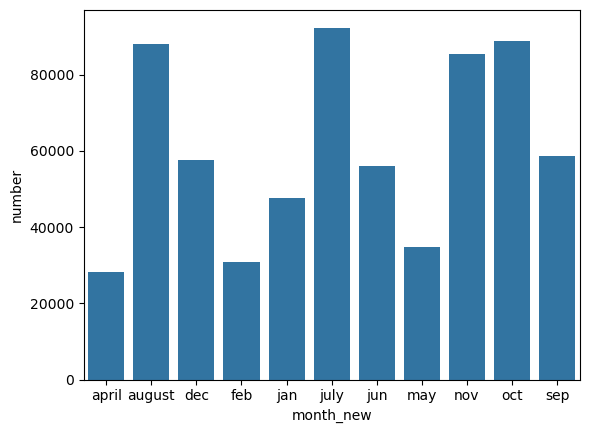

In [23]:
sns.barplot(x='month_new', y='number', data=df1)

In [24]:
df2=df.groupby('year')['number'].sum().reset_index()
df2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<Axes: xlabel='year', ylabel='number'>

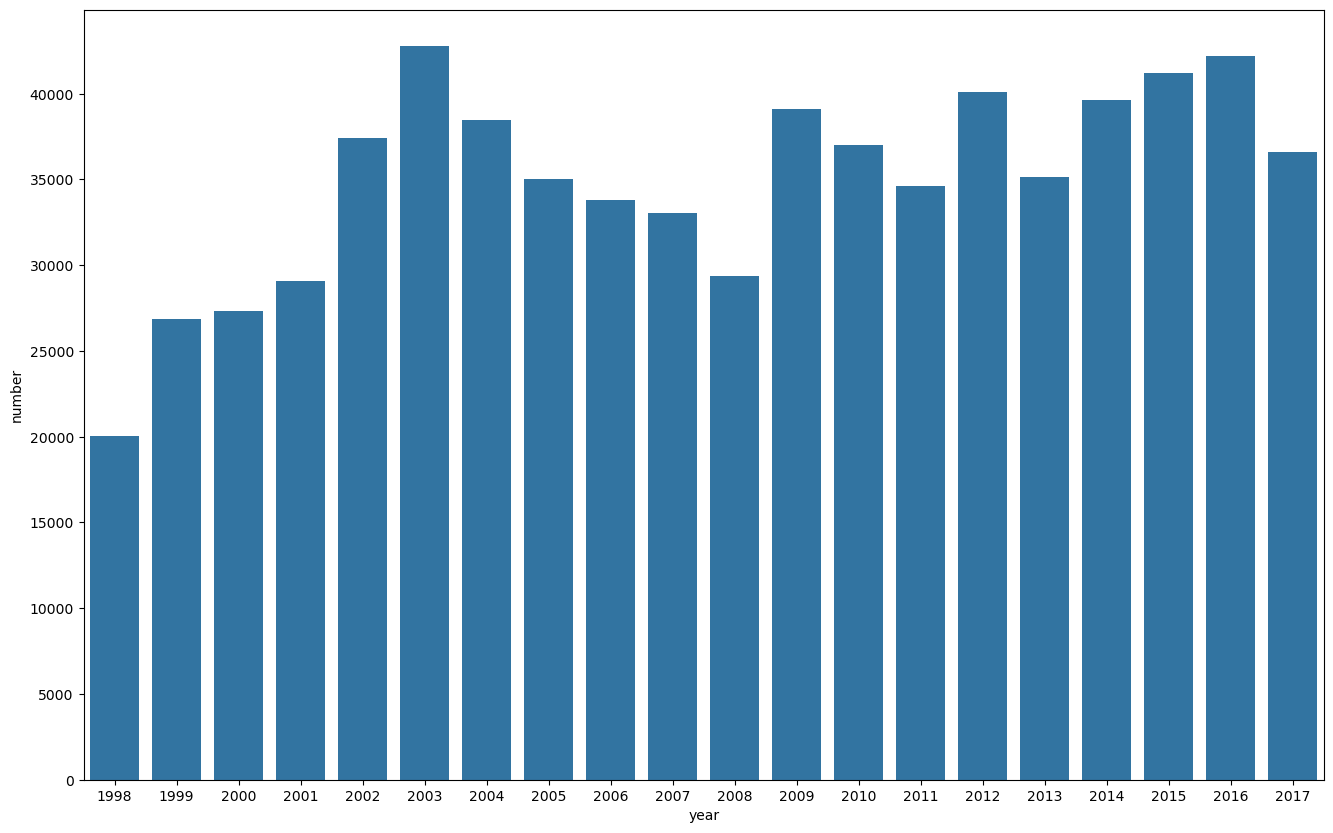

In [28]:
plt.figure(figsize=(16,10))
sns.barplot(x='year', y='number', data=df2)